<a href="https://colab.research.google.com/github/tabaraei/CheatSheet/blob/master/notebooks/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Getting Started

In [1]:
import torch
import numpy as np

# Check if GPU is available
torch.cuda.is_available()

True

In [2]:
x = torch.tensor([1])
print(x.device)
x = x.to('cuda')
print(x.device)
y = torch.tensor([1], device='cuda')
print(y.device)

cpu
cuda:0
cuda:0


### Define Tensors

In [3]:
torch.tensor([1,2,3])

tensor([1, 2, 3])

In [4]:
torch.zeros(2,3, dtype=torch.int32), \
torch.ones(2), \
torch.empty(2), \
torch.rand(2)

(tensor([[0, 0, 0],
         [0, 0, 0]], dtype=torch.int32),
 tensor([1., 1.]),
 tensor([-5.8644e-16,  3.0801e-41]),
 tensor([0.4345, 0.0029]))

In [5]:
array = np.array([1,2,3])
torch.from_numpy(array), \
torch.tensor(array), \
torch.tensor(array).numpy()
# Careful that modifying numpy array will affect tensor and vice versa

(tensor([1, 2, 3]), tensor([1, 2, 3]), array([1, 2, 3]))

### Mathematical Operations with Tensors

In [6]:
t1 = torch.ones(3)
t2 = torch.tensor([1,2.,3]) # dtype of all values will be the same
t2, t2.shape, t2.dtype, t2.size()

(tensor([1., 2., 3.]), torch.Size([3]), torch.float32, torch.Size([3]))

In [7]:
# Note: every function with underscore inplaces value
# main operations are: add, sub, mul, div
t1 + t2, torch.add(t1, t2), t2.add_(t1)

(tensor([2., 3., 4.]), tensor([2., 3., 4.]), tensor([2., 3., 4.]))

### Slicing within Tensors

In [8]:
t1 = torch.rand(3,4)
t1, t1[:,1], t1[1:3, 1:4], t1[0, 0].item()

(tensor([[0.1438, 0.8735, 0.5152, 0.1795],
         [0.1737, 0.5774, 0.7629, 0.5976],
         [0.1775, 0.8521, 0.2266, 0.9676]]),
 tensor([0.8735, 0.5774, 0.8521]),
 tensor([[0.5774, 0.7629, 0.5976],
         [0.8521, 0.2266, 0.9676]]),
 0.1438007950782776)

### Reshaping Tensors

In [9]:
t1 = torch.rand(16)
t1.view(-1, 8)

tensor([[0.6165, 0.9824, 0.1246, 0.0717, 0.3715, 0.5199, 0.0811, 0.6979],
        [0.1035, 0.7064, 0.5744, 0.6174, 0.5151, 0.5576, 0.4827, 0.7918]])

In [10]:
torch.device("cuda")

device(type='cuda')

In [11]:
t1.device

device(type='cpu')

### Gradients

In [12]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)

# forward pass
y_hat = w*x
loss = (y_hat - y)**2
print(loss)

# backward pass
loss.backward()
print(w.grad)

# x.requires_grad_(False)
# use x.grad.zero_() at the end of loops!

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


### Linear Regression

In [ ]:
# model selection and params
# loss function and optimizer
# Training loop:
# - forward pass
# - backward pass
# - update weights

In [13]:
# Simplest Solution Without Using AutoGrad

import numpy as np

X = np.array([1,2,3,4], dtype=np.float32)
Y = np.array([2,4,6,8], dtype=np.float32)
W = 0.0

# model prediction: f = x * w
def forward(x):
  return W * x

# loss: MSE = 1/N (wx - y)^2
def loss(y, y_pred):
  return ((y - y_pred)**2).mean()

# gradient: grad = 1/N 2x (wx - y)
def gradient(x, y, y_pred):
  return np.dot(2*x, y_pred-y).mean()

print(f'prediction before training: {forward(5)}')

# training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
  y_pred = forward(X)
  err = loss(Y, y_pred)
  dw = gradient(X, Y, y_pred)
  W -= learning_rate*dw

  if epoch % 2 == 0:
    print(f'epoch {epoch+1}: , w = {W}, loss = {err}')

prediction before training: 0.0
epoch 1: , w = 1.2, loss = 30.0
epoch 3: , w = 1.871999988555908, loss = 0.7680001854896545
epoch 5: , w = 1.9795200133323667, loss = 0.019660834223031998
epoch 7: , w = 1.9967231869697568, loss = 0.0005033080233260989
epoch 9: , w = 1.999475698471069, loss = 1.2884394891443662e-05
epoch 11: , w = 1.9999160599708554, loss = 3.297340072094812e-07
epoch 13: , w = 1.9999865984916685, loss = 8.487816671731707e-09
epoch 15: , w = 1.9999978351593015, loss = 2.1679014139408537e-10
epoch 17: , w = 1.9999996304512022, loss = 5.076827847005916e-12
epoch 19: , w = 1.9999999165534972, loss = 1.3145040611561853e-13


In [14]:
# Using Backward AutoGrad

import torch

X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)
W = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction: f = x * w
def forward(x):
  return W * x

# loss: MSE = 1/N (wx - y)^2
def loss(y, y_pred):
  return ((y - y_pred)**2).mean()

print(f'prediction before training: {forward(5)}')

# training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
  y_pred = forward(X)
  err = loss(Y, y_pred)
  err.backward()
  with torch.no_grad():
    W -= learning_rate*W.grad

  W.grad.zero_()
  if epoch % 10 == 0:
    print(f'epoch {epoch+1}: , w = {W}, loss = {err}')

prediction before training: 0.0
epoch 1: , w = 0.29999998211860657, loss = 30.0
epoch 11: , w = 1.6653136014938354, loss = 1.1627856492996216
epoch 21: , w = 1.934108853340149, loss = 0.0450688973069191
epoch 31: , w = 1.987027645111084, loss = 0.0017468547448515892
epoch 41: , w = 1.9974461793899536, loss = 6.770494655938819e-05
epoch 51: , w = 1.9994971752166748, loss = 2.6243997126584873e-06
epoch 61: , w = 1.9999010562896729, loss = 1.0175587306093803e-07
epoch 71: , w = 1.9999804496765137, loss = 3.9741685498029256e-09
epoch 81: , w = 1.999996304512024, loss = 1.4670220593870908e-10
epoch 91: , w = 1.9999992847442627, loss = 5.076827847005916e-12


In [35]:
# With Predefined Optimizer and Loss Funcionts

import torch
import torch.nn as nn

X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)
W = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction: f = x * w
def forward(x):
  return W * x

# loss: MSE = 1/N (wx - y)^2
loss = nn.MSELoss()

print(f'prediction before training: {forward(5)}')

# training
learning_rate = 0.01
n_iters = 100
optimizer = torch.optim.SGD([W], lr=learning_rate)

for epoch in range(n_iters):
  y_pred = forward(X)
  err = loss(Y, y_pred)
  err.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch % 10 == 0:
    print(f'epoch {epoch+1}: , w = {W}, loss = {err}')

prediction before training: 0.0
epoch 1: , w = 0.29999998211860657, loss = 30.0
epoch 11: , w = 1.6653136014938354, loss = 1.1627856492996216
epoch 21: , w = 1.934108853340149, loss = 0.0450688973069191
epoch 31: , w = 1.987027645111084, loss = 0.0017468547448515892
epoch 41: , w = 1.9974461793899536, loss = 6.770494655938819e-05
epoch 51: , w = 1.9994971752166748, loss = 2.6243997126584873e-06
epoch 61: , w = 1.9999010562896729, loss = 1.0175587306093803e-07
epoch 71: , w = 1.9999804496765137, loss = 3.9741685498029256e-09
epoch 81: , w = 1.999996304512024, loss = 1.4670220593870908e-10
epoch 91: , w = 1.9999992847442627, loss = 5.076827847005916e-12


In [45]:
# With Predefined Models, or Class Models

import torch
import torch.nn as nn

X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)
X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape

# # We could use a model class
# class LinearRegression(nn.Module):
#   def __init__(self, input_dim, output_dim):
#     super(LinearRegression, self).__init__()
#     # define layers
#     self.lin= nn.Linear(input_dim, output_dim)
#   def forward(self, x):
#     return self.lin(x)
# model = LinearRegression(n_features, n_features)

# or use defined models
model = nn.Linear(in_features=n_features, out_features=n_features)

loss = nn.MSELoss()
learning_rate = 0.01
n_iters = 2800
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

print(f'prediction before training: {model(X_test).item()}')
for epoch in range(n_iters):
  y_pred = model(X)
  err = loss(Y, y_pred)
  err.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch % (n_iters/10) == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0,0].item():.3f}, b = {b[0].item():.3f}, loss = {err:.3f}, pred = {model(X_test).item():.3f}')

prediction before training: -2.3496627807617188
epoch 1: w = -0.302, b = 1.036, loss = 41.454, pred = -0.475
epoch 281: w = 1.760, b = 0.704, loss = 0.083, pred = 9.507
epoch 561: w = 1.897, b = 0.304, loss = 0.016, pred = 9.787
epoch 841: w = 1.955, b = 0.131, loss = 0.003, pred = 9.908
epoch 1121: w = 1.981, b = 0.057, loss = 0.001, pred = 9.960
epoch 1401: w = 1.992, b = 0.025, loss = 0.000, pred = 9.983
epoch 1681: w = 1.996, b = 0.011, loss = 0.000, pred = 9.993
epoch 1961: w = 1.998, b = 0.005, loss = 0.000, pred = 9.997
epoch 2241: w = 1.999, b = 0.002, loss = 0.000, pred = 9.999
epoch 2521: w = 2.000, b = 0.001, loss = 0.000, pred = 9.999


Features shape: [100, 1], Classes shape: [100, 1]
epoch 1: w = 1.550, b = -0.548, loss = 5726.705, pred = 7.202
epoch 31: w = 51.980, b = 4.871, loss = 1112.806, pred = 264.770
epoch 61: w = 71.141, b = 5.086, loss = 440.355, pred = 360.791
epoch 91: w = 78.247, b = 4.641, loss = 347.702, pred = 395.876
epoch 121: w = 80.896, b = 4.329, loss = 334.711, pred = 408.810
epoch 151: w = 81.888, b = 4.173, loss = 332.873, pred = 413.611
epoch 181: w = 82.260, b = 4.103, loss = 332.611, pred = 415.402
epoch 211: w = 82.400, b = 4.074, loss = 332.574, pred = 416.073
epoch 241: w = 82.453, b = 4.062, loss = 332.568, pred = 416.325
epoch 271: w = 82.472, b = 4.057, loss = 332.568, pred = 416.419


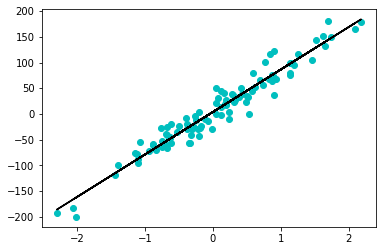

In [91]:
# All in One

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Prepare Data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32)).view(y_numpy.shape[0], 1)
X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape
print(f'Features shape: {list(X.shape)}, Classes shape: {list(y.shape)}')

# Model and Optimizer Selection
model = nn.Linear(in_features=n_features, out_features=n_features)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.5)
loss = nn.MSELoss()
learning_rate = 0.01
n_iters = 300

# Training Loop
for epoch in range(n_iters):
  y_pred = model(X)
  err = loss(y_pred, y)
  err.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch % (n_iters/10) == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0,0].item():.3f}, b = {b[0].item():.3f}, loss = {err:.3f}, pred = {model(X_test).item():.3f}')

# Plot
predicted = model(X).detach().numpy()
_ = plt.plot(X_numpy, y_numpy, 'co')
_ = plt.plot(X_numpy, predicted, 'k')

### Logistic Regression

In [113]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Load and Split the Data
dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = \
  train_test_split(X, y, train_size=0.8, random_state=1)
n_features = X.shape[1]

# Preprocess the Data
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

# Prepare the 
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32)).view(y_train.shape[0], 1)
y_test = torch.from_numpy(y_test.astype(np.float32)).view(y_test.shape[0], 1)

# Model Selection

# Loss and Optimizer

# Training Loop